In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("sales_data.csv")
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       NaN
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0
6     1007        Meena    Lalitpur       Phone  Electronics         1  30000      50.0
7     1008       Ramesh   Kathmandu        Book   Stationery         5    500      -5.0
8     1009         Sita     Pokhara         Pen   Stationery        10     50       0.0
9     1010        Suman   Kathmandu      Laptop  Electronics         1  80000     110.0


In [ ]:
df["TotalAmount"] = df["Quantity"] * df["Price"]

In [6]:
df["TotalAmount"].sum()

np.int64(365000)

In [7]:
df.groupby(["Product","City"])["TotalAmount"].sum().sort_values(ascending=False)

Product     City      
Laptop      Kathmandu     240000
Phone       Pokhara        60000
            Lalitpur       30000
Chair       Biratnagar     15000
Table       Pokhara        15000
Book        Kathmandu       2500
Headphones  Kathmandu       2000
Pen         Pokhara          500
Name: TotalAmount, dtype: int64

In [11]:
df.groupby(["CustomerName","Product"])["TotalAmount"].sum().sort_values(ascending=False)

CustomerName  Product   
Anish         Laptop        160000
Suman         Laptop         80000
Riya          Phone          60000
Meena         Phone          30000
Kiran         Chair          15000
Ramesh        Book            2500
Suman         Headphones      2000
Sita          Pen              500
Name: TotalAmount, dtype: int64

In [13]:
#checking which category ko product is purchased how much in which city 
df.groupby(["Category","Quantity","City"])["TotalAmount"].sum()

Category     Quantity  City      
Electronics  1         Kathmandu     242000
                       Lalitpur       30000
             2         Pokhara        60000
Furniture    1         Pokhara        15000
             3         Biratnagar     15000
Stationery   5         Kathmandu       2500
             10        Pokhara          500
Name: TotalAmount, dtype: int64

In [16]:
#Adding a discountAmount
df["DiscountAmount"] = df["TotalAmount"] * (df["Discount"]/100)


In [ ]:
df["DiscountAmount"] #dicountAmount = TotalAmount*(discount/100)

0     8000.0
1     3000.0
2        NaN
3     8000.0
4        0.0
5      750.0
6    15000.0
7     -125.0
8        0.0
9    88000.0
Name: DiscountAmount, dtype: float64

In [ ]:
df["Discount"] = df["Discount"].fillna(0) #converting nan value into 0 using fillna

In [19]:
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             NaN
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0
6     1007        Meena    Lalitpur       Phone  Electronics         1  30000      50.0        30000         15000.0
7     1008       Ramesh   Kathmandu        Book   Stationery    

In [ ]:
df["DiscountAmount"] = df["DiscountAmount"].fillna(0) #Converting into DiscountAmount with fillna Nan value

In [23]:
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             0.0
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0
6     1007        Meena    Lalitpur       Phone  Electronics         1  30000      50.0        30000         15000.0
7     1008       Ramesh   Kathmandu        Book   Stationery    

In [24]:
#Creating a NetAmount to know how much the money is earned 
df["NetAmount"] = df["TotalAmount"]-df["DiscountAmount"]

In [ ]:
df[["TotalAmount","Discount","DiscountAmount","NetAmount"]].head() #Showing Netamount after discount price 

,TotalAmount,Discount,DiscountAmount,NetAmount
0,80000,10.0,8000.0,72000.0
1,60000,5.0,3000.0,57000.0
2,2000,0.0,0.0,2000.0
3,80000,10.0,8000.0,72000.0
4,15000,0.0,0.0,15000.0


In [ ]:
df["NetAmount"].sum() #Checking the final netamount sum earned 

np.float64(242375.0)

In [ ]:
df.groupby(["City","Product"])["NetAmount"].sum().sort_values(ascending=False) #Checking the NetAmount in Ciity and product that are been solded

City        Product   
Kathmandu   Laptop        136000.0
Pokhara     Phone          57000.0
Lalitpur    Phone          15000.0
Biratnagar  Chair          15000.0
Pokhara     Table          14250.0
Kathmandu   Book            2625.0
            Headphones      2000.0
Pokhara     Pen              500.0
Name: NetAmount, dtype: float64

In [ ]:
#Ranking city with amount / kati kamayo ta kun city ma
city_sales = df.groupby("City")["NetAmount"].sum().sort_values(ascending=False) 
city_sales

City
Kathmandu     140625.0
Pokhara        71750.0
Biratnagar     15000.0
Lalitpur       15000.0
Name: NetAmount, dtype: float64

In [31]:
category_sales=df.groupby("Category")["NetAmount"].sum().sort_values(ascending=False)
category_sales

Category
Electronics    210000.0
Furniture       29250.0
Stationery       3125.0
Name: NetAmount, dtype: float64

In [ ]:
df.groupby("Category")["NetAmount"].sum() #category ko total net amount sales 

Category
Electronics    210000.0
Furniture       29250.0
Stationery       3125.0
Name: NetAmount, dtype: float64

In [ ]:
category_percentage = (category_sales/category_sales.sum())*100 #showing the share of total revenue
category_percentage

Category
Electronics    86.642599
Furniture      12.068076
Stationery      1.289324
Name: NetAmount, dtype: float64

<Axes: xlabel='Category'>

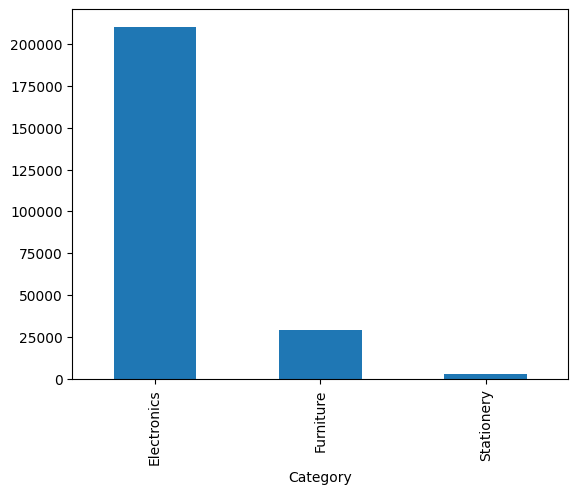

In [ ]:
category_sales.plot(kind="bar") #displaying in chart

In [40]:
df.to_csv("sales_backup.csv",index=False)